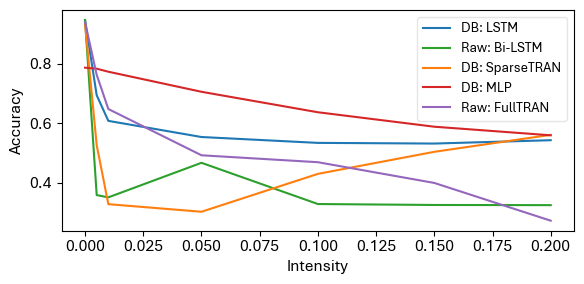

In [6]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager

font_dirs = ['//Users/oscarb/Downloads/aptos-font', ]  # The directory containing your font file
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = 'Aptos'
# plt.rcParams['font.serif'] = ['Palatino']
plt.rcParams['font.size'] = 12 

# Load JSON data
def load_json_data(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

lstm_data_db = load_json_data('peak_lstm_db.json')['data']
lstm_bi_data_no_db = load_json_data('peak_lstm_no_db.json')['data']
transformer_data_full = load_json_data('peak_full_tran_no_db.json')['data']
mlp = load_json_data('peaks_MLP.json')['data']
transformer_data_sparse = load_json_data('peak_sparse_transformer_db.json')['data']

# Extract intensities and accuracies
def extract_data(data):
    intensities = [item[0] for item in data]
    accuracies = [item[1] for item in data]
    return intensities, accuracies

intensities_lstm, accuracies_lstm = extract_data(lstm_data_db)
intensities_lstm_bi, accuracies_lstm_bi = extract_data(lstm_bi_data_no_db)
intensities_transformer_full, accuracies_transformer_full = extract_data(transformer_data_full)
intensities_mlp, accuracies_mlp = extract_data(mlp)
intensities_transformer_sparse, accuracies_transformer_sparse = extract_data(transformer_data_sparse)

# Set the font
# plt.rcParams.update({'font.family': 'Palatino', 'font.size': 10})

# Set seaborn color palette
colors = sns.color_palette("tab10")

# Plot
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(intensities_lstm, accuracies_lstm, label='DB: LSTM', color=colors[0])
ax.plot(intensities_lstm_bi, accuracies_lstm_bi, label='Raw: Bi-LSTM', color=colors[2])
ax.plot(intensities_transformer_sparse, accuracies_transformer_sparse, label='DB: SparseTRAN', color=colors[1])
ax.plot(intensities_mlp, accuracies_mlp, label='DB: MLP', color=colors[3])
ax.plot(intensities_transformer_full, accuracies_transformer_full, label='Raw: FullTRAN', color=colors[4])


# Adding axis labels
ax.set_xlabel('Intensity')
ax.set_ylabel('Accuracy')

# Add legend to the plot
ax.legend(loc='best', fontsize='small', fancybox=True, framealpha=0.5)

plt.tight_layout()

plt.savefig('/Users/oscarb/Downloads/2random_peak_metrics.pdf', format='pdf')
plt.show()
